In [3]:
import numpy as np
import imageio
import cv2 
import glob
import matplotlib.pyplot as plt

## Create Images


In [4]:
circle_coordinates = np.arange(10,90,15)
out_images = []
counter  = 0
render_list = []
for x in circle_coordinates:
    image = np.zeros([100,100,3])
    image = cv2.circle(
	image, 
	(x, 45), 
	5, 
	(255, 255, 255), 
	5 
    )
    image = image.astype(np.uint8)
    plt.imsave("Images/" + str(counter) + ".png",image)
    render_list.append(image)
    counter += 1


## Import Images


In [5]:
images = sorted(glob.glob("Images/*.png"))
image_list = []
for image in images:
    temp = plt.imread(image,"png")
    image_list.append(temp.astype(float))

## Generate Sinusoid 

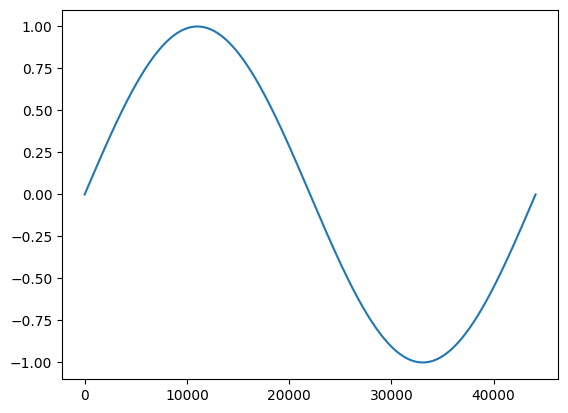

In [6]:
sr = 44100
hz = 1
temp = np.linspace(0,1,sr)
sinusoid = np.sin(2 * np.pi * temp)
plt.plot(sinusoid)


## Image Ringmodulation


In [7]:

images_copy = image_list.copy()

sr = 100 * 100
sr_half = sr // 2
flat_size = sr
flat_size_max = flat_size * 4

out_image =  np.zeros(100 * 100 * 4)
num_iters  = (7 * 4) * 4
render_list = []

vals = np.linspace(0,1,flat_size_max)

out = np.zeros(flat_size_max)
for iters in range(num_iters):
    for images in images_copy:
        out = images.flatten().astype(float)
        hz = (np.random.uniform(1,sr_half))
        modulator = np.sin(2 * np.pi * vals * hz)
        out *= modulator
        display = np.reshape(out,[100,100,4])
        display *= 255 
        render_list.append(display.astype(np.uint8))


In [8]:
imageio.mimsave('Renders/image_ringmodulation.gif', render_list, loop=65535)